## Thallys Oliveira - Questão 3 - Lista 2

In [55]:
# Importanto Bibliotecas 

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

Filtro passa-baixa.

1. Carregue a imagem rgb_blocks_ruidosa.bmp. Ela é uma imagem colorida que foi degrada com ruído Gaussiano. 

In [56]:
local_img_bpm = '/home/thallys/Documentos/Graduação/Visão Computacional/Visao_computacional/Lista 2/Arquivos/rgb_blocks_ruidosa.bmp'

# Lendo a imagem borboleta.bmp
img_blocks_ruido = cv.imread(local_img_bpm)

# Convertendo a imagem borboleta.bpm para RGB
img_blocks_ruido = cv.cvtColor(img_blocks_ruido, cv.COLOR_BGR2RGB)

plt.title("Imagem Stripes")
plt.imshow(img_blocks_ruido)
plt.show()

2. Filtre a imagem com o filtro da média de kernel 7x7 utilizando a função cv.blur().

In [57]:
kernel = 7
img_blocks_filtrada = cv.blur(img_blocks_ruido,(kernel,kernel))

2. Converta a imagem original (com ruído) de RGB para HSV. Mostre os canais da imagem ruidosa separadamente em um subplot. Coloque título em todas elas. Use colormap='gray' para mostrar os canais. 

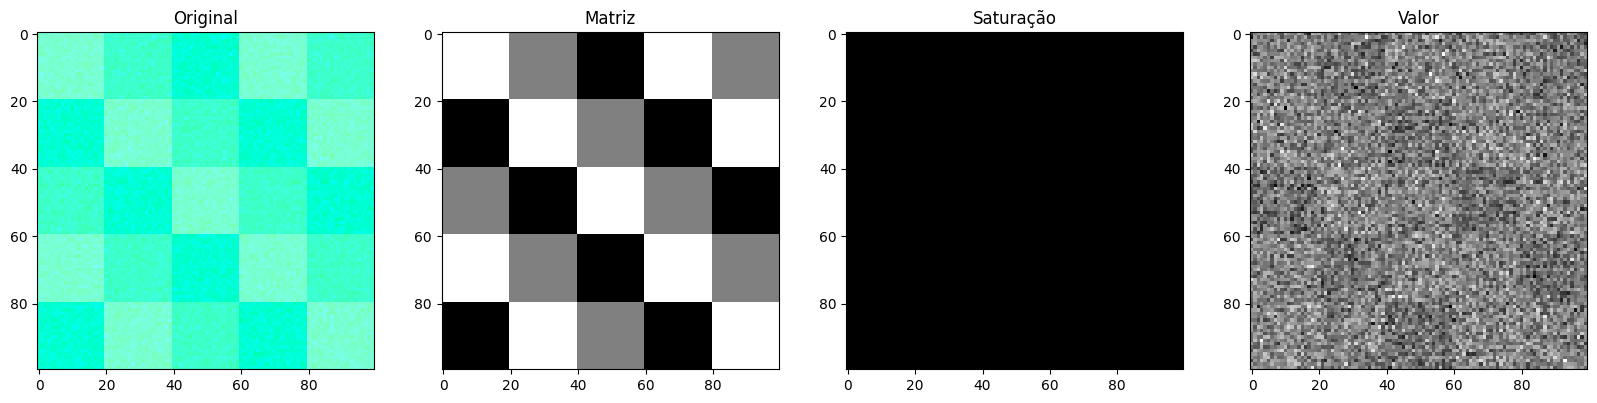

In [58]:
img_HSV_ruido	= cv.cvtColor(img_blocks_ruido, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_HSV_ruido)

# Plotando todas as imagens juntas
plt.figure(figsize=(20,60))
plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(img_HSV_ruido)

plt.subplot(1,4,2)
plt.title("Matriz")
plt.imshow(H, cmap='gray')

plt.subplot(1,4,3)
plt.title("Saturação")
plt.imshow(S, cmap='gray')

plt.subplot(1,4,4)
plt.title("Valor")
plt.imshow(V, cmap='gray')

plt.show()

4. Dentre as componentes HSV, escolha a mais adequada para ser filtrada. Utilize o mesmo filtro do item 2. Mostre o canal escolhido antes e depois da filtragem. Use colormap='gray'.

In [59]:
kernel = 7
canal_V_filtrado = cv.blur(V,(kernel,kernel))

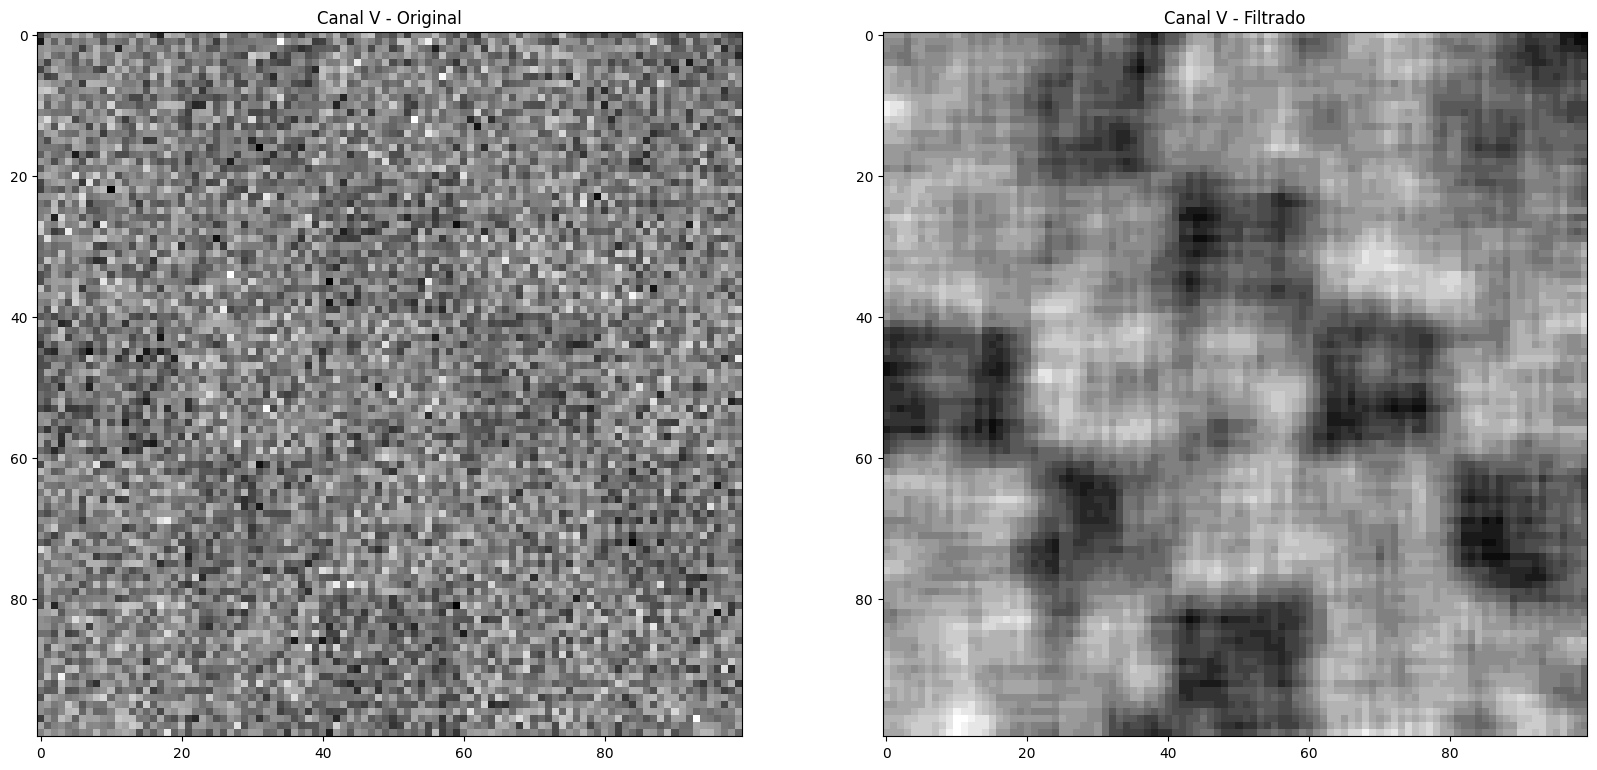

In [60]:
# Plotando todas as imagens juntas

plt.figure(figsize=(20,60))
plt.subplot(1,2,1)
plt.title("Canal V - Original")
plt.imshow(V, cmap='gray')

plt.subplot(1,2,2)
plt.title("Canal V - Filtrado")
plt.imshow(canal_V_filtrado, cmap='gray')

plt.show()

5. Recomponha a imagem HSV com esta componente filtrada e reconverta para RGB. Mostre a imagem resultante. O que se pode concluir?

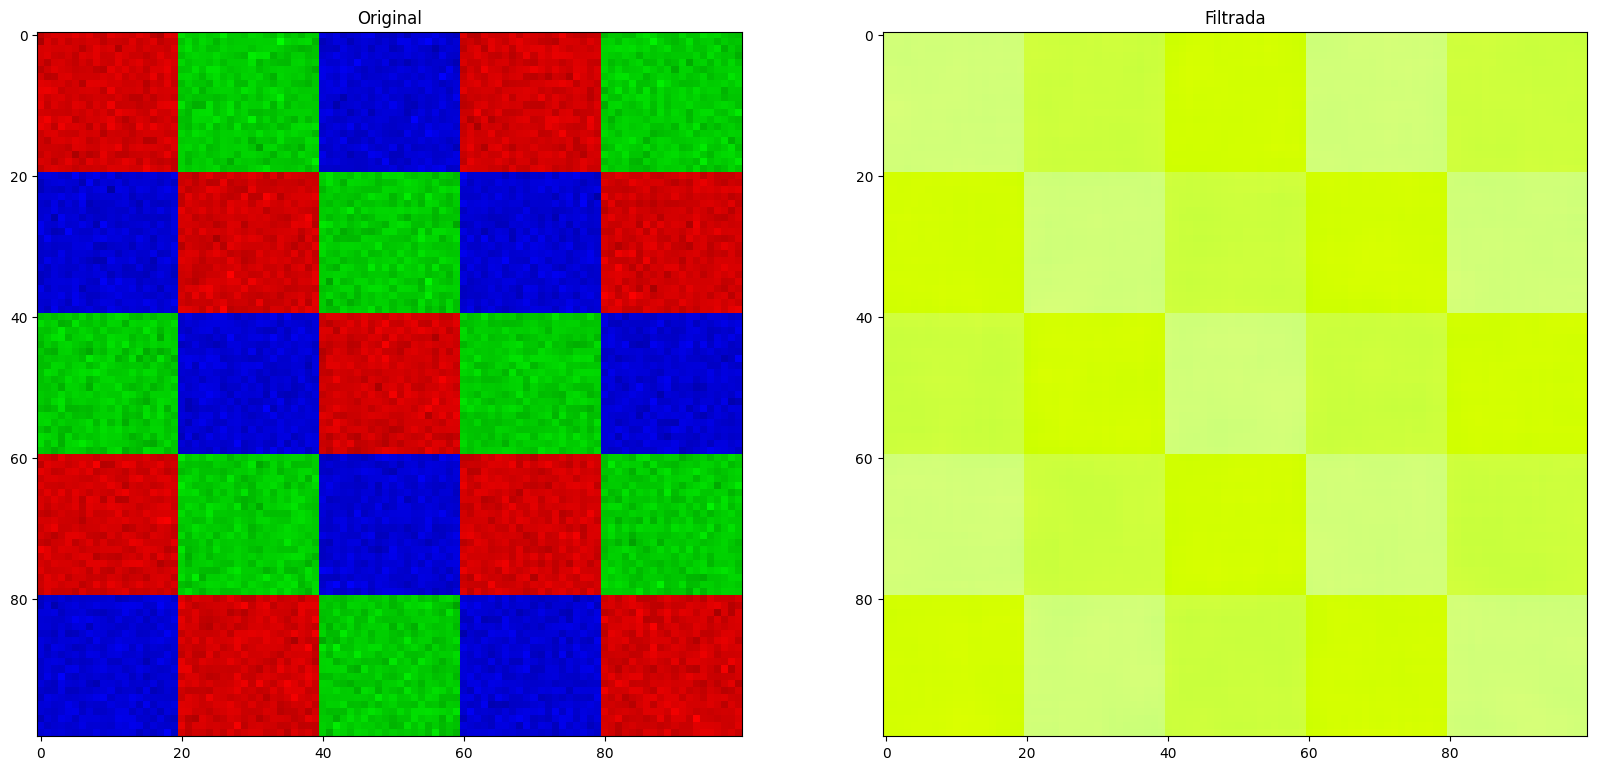

In [61]:
img_HSV_recom = np.stack((H,S,canal_V_filtrado),axis=-1)
img_RGB_recom = cv.cvtColor(img_HSV_recom, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,60))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_blocks_ruido)

plt.subplot(1,2,2)
plt.title("Filtrada")
plt.imshow(img_RGB_recom)

plt.show()

#### Comentário:



Filtro passa-alta.

1. Carregue e mostre a imagem rgb_stripes.bmp. Ela é uma imagem colorida contendo listras em diferentes cores.

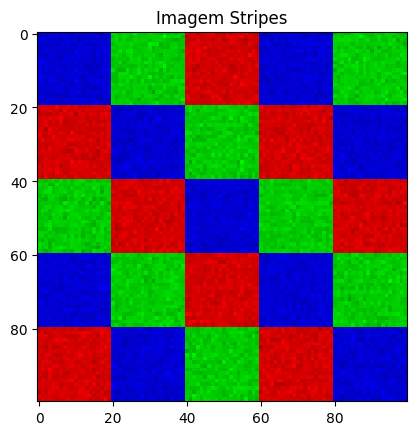

In [62]:
local_img_bpm = '/home/thallys/Documentos/Graduação/Visão Computacional/Visao_computacional/Lista 2/Arquivos/rgb_stripes.bmp'

# Lendo a imagem borboleta.bmp
img_stripes_ruido = cv.imread(local_img_bpm)

# Convertendo a imagem borboleta.bpm para RGB
img_stripes_ruido = cv.cvtColor(img_blocks_ruido, cv.COLOR_BGR2RGB)

plt.title("Imagem Stripes")
plt.imshow(img_stripes_ruido)
plt.show()